# Regression: Model Building and Interpretation

### by

# Jeff Gross

based on SAS e-learning

### Methodology

#### Run all methods 
#### Look for commonalities 
#### Narrow down models 

### Other Honest Assessment Approaches 
#### training & testing
#### cross-validation (if data set isn't large enough to split)
#### bootstrapping 
It is a resampling method that tries to approximate the distribution of the parameter estimates to estimate the standard error.    

<img src="files/mallow_1.png">

<img src="files/mallow_2.png">

<img src="files/selection_1.png">

<img src="files/selection_5.png">

<img src="files/selection_2.png">

<img src="files/selection_6.png">

<img src="files/selection_3.png">

<img src="files/selection_7.png">

In [2]:
libname statdata "/folders/myfolders/ECST131"; 
libname library "/folders/myfolders/ECST131";

<img src="files/selection_4.png">

### Task: Using the Statdata.BodyFat2 data set, perform multiple linear regression using all-possible regression techniques.

### Result:  
#### Mallows (Prediction):The plot indicates that the best model according to Mallows' criterion is an 8-parameter model. The best Mallows model is number 1 (7 variables in model plus an intercept equals 8 parameters). This model includes the variables Age, Weight, Neck, Abdomen, Thigh, Forearm, and Wrist.

#### Hocking's Criterion (Parameter Estimation): The best model according to Hocking's criterion has 10 parameters (including the intercept). The table lists 60 models, their Cp values, and the numbers of variables in the models. The best HOCKING model is number 4. It includes Hip and Biceps, along with Age, Weight, Neck, Abdomen, Thigh, Forearm, and Wrist


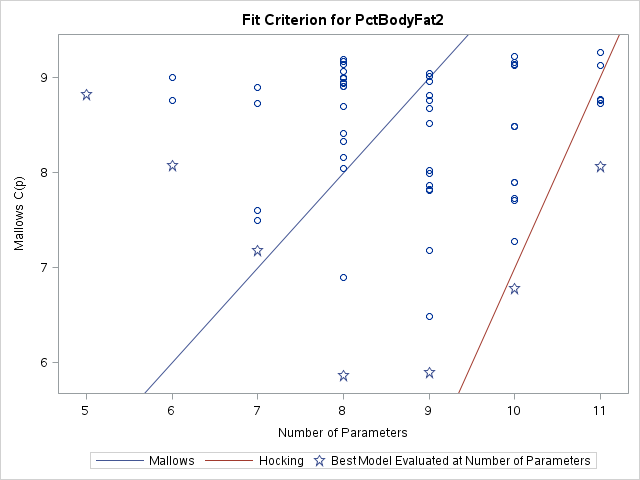

In [3]:
ods graphics / imagemap=on;
proc reg data=statdata.bodyfat2 plots(only)=(cp);
   model PctBodyFat2 = Age Weight Height
         Neck Chest Abdomen Hip Thigh
         Knee Ankle Biceps Forearm Wrist
         / selection=cp best=60;
   title "Using Mallows' Cp for Model Selection";
run;
quit;
title;

### Task: Using the Statdata.BodyFat2 data set, identify a set of "best" models using significance-level model selection techniques: stepwise.

### Results: Selection stopped because the candidate for entry has SLE > 0.15 and the candidate for removal has SLS < 0.15. The stepwise selection process, using significance level, appears to select an eight-effect model (including the intercept).


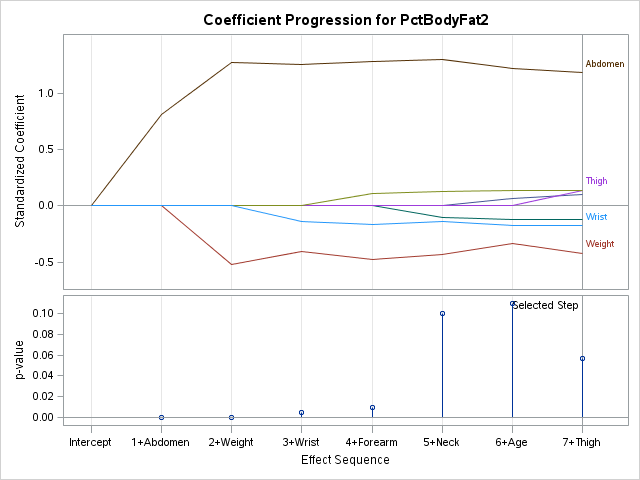
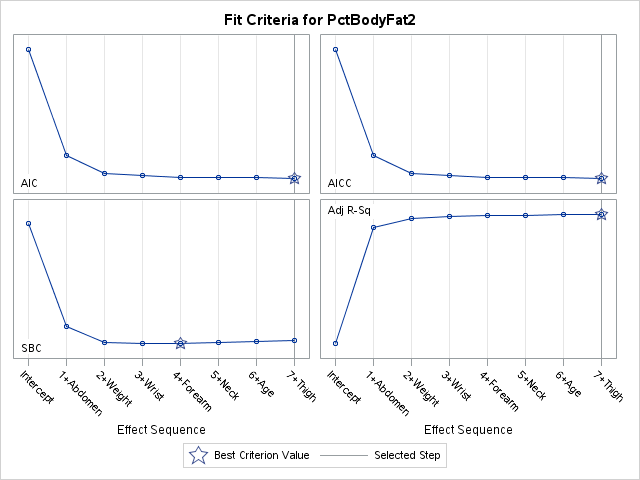
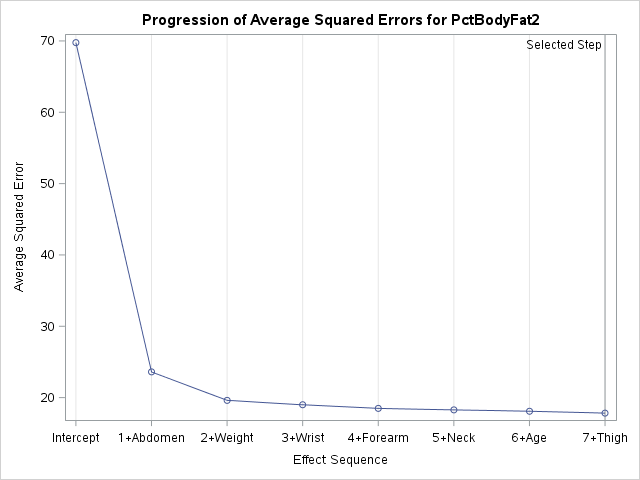

In [4]:
ods graphics on;
proc glmselect data=statdata.bodyfat2 plots=all;
   STEPWISESL: model PctBodyFat2=Age Weight Height
                     Neck Chest Abdomen Hip Thigh
                     Knee Ankle Biceps Forearm Wrist
                     / SELECTION=STEPWISE SELECT=SL;
   title 'SL STEPWISE Selection with PctBodyFat2';
run;
quit;
title;

### Task: Using the Statdata.BodyFat2 data set, identify a set of "best" models using significance-level model selection techniques: forward.

### Result: Selection stopped as the candidate for entry has SLE > 0.5. The forward selection process, using significance level, appears to select an 11-effect model (including the intercept).


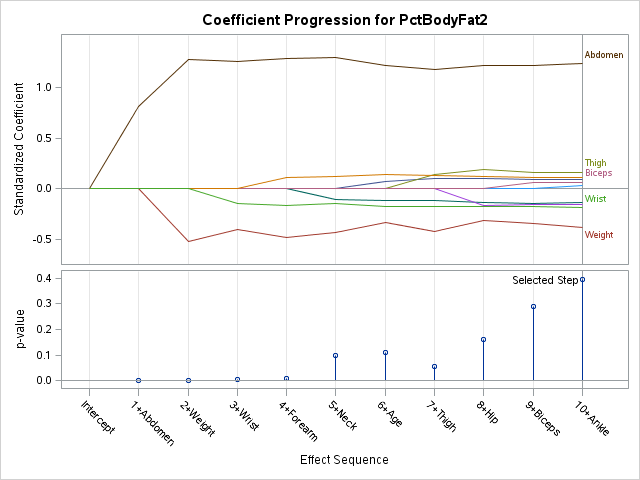
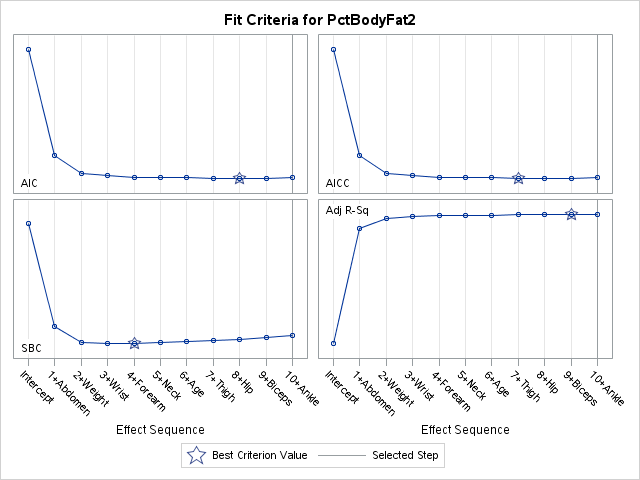
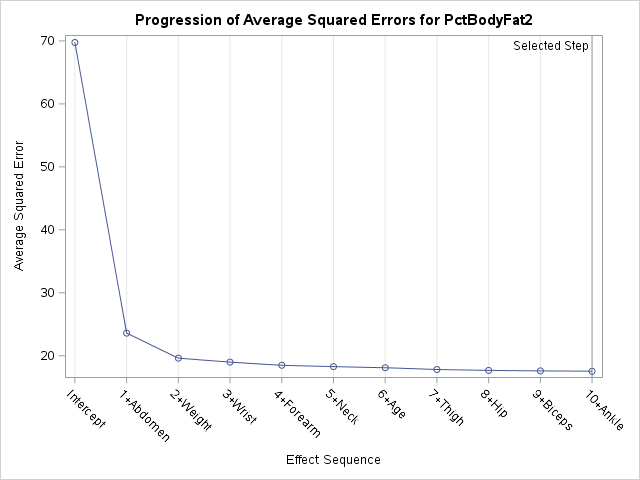

In [5]:
title 'SL FORWARD Selection with PctBodyFat2';
proc glmselect data=statdata.bodyfat2 plots=all;
   FORWARDSL: model PctBodyFat2=Age Weight Height
                    Neck Chest Abdomen Hip Thigh
                    Knee Ankle Biceps Forearm Wrist
                    / SELECTION=FORWARD SELECT=SL; 
run;
quit;
title;

### Information Criteria 
#### • Akaike's information criterion (AIC) 
#### • corrected Akaike's information criterion (AICC) 
#### • Sawa Bayesian information criterion (BIC) 
#### • Schwarz Bayesian information criterion (SBC) 

<img src="files/info_crit_1.png">

<img src="files/info_crit_2.png">

### Task: Use the Statdata.BodyFat2 data set to identify a set of “best” models using the information criteria SBC.

### Result: Using the information criteria, SBC, the selected model contains five effects (including the intercept).


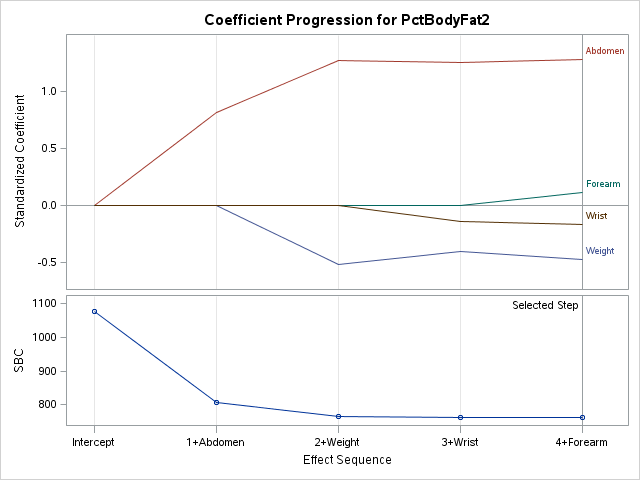
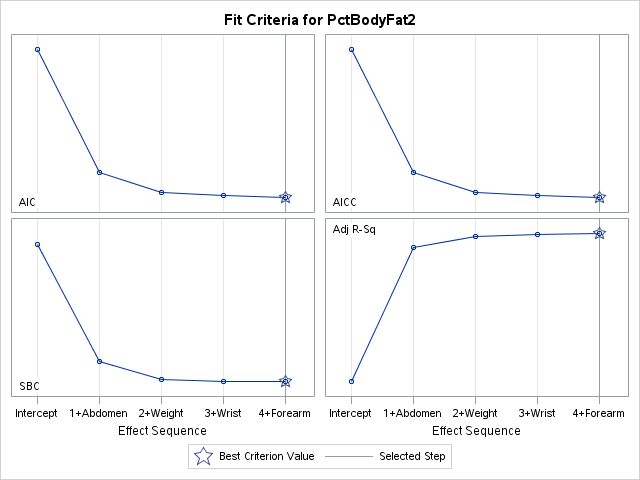
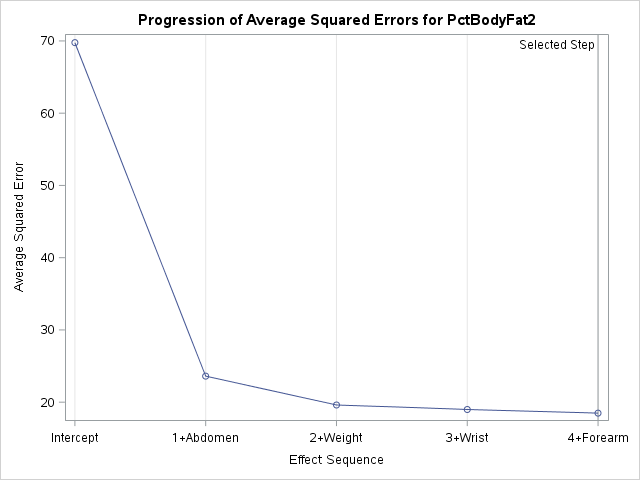

In [6]:
ods graphics on;
title 'SBC STEPWISE Selection with PctBodyFat2';
proc glmselect data=statdata.bodyfat2 plots=all;
   STEPWISESBC: model PctBodyFat2=Age Weight Height Neck Chest
                      Abdomen Hip Thigh Knee Ankle Biceps Forearm
                      Wrist / SELECTION=STEPWISE SELECT=SBC;
run;
quit;
title;

### Task: Use the Statdata.BodyFat2 data set to identify a set of “best” models using the information criteria AIC.

### Result: Using the AIC information criteria, the selected model contains nine effects (including the intercept).


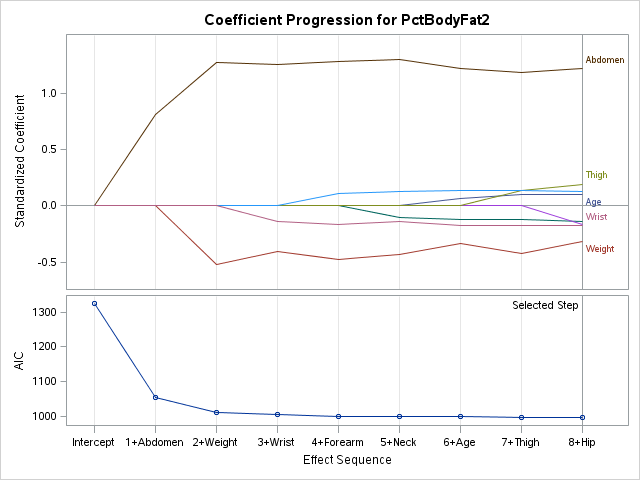
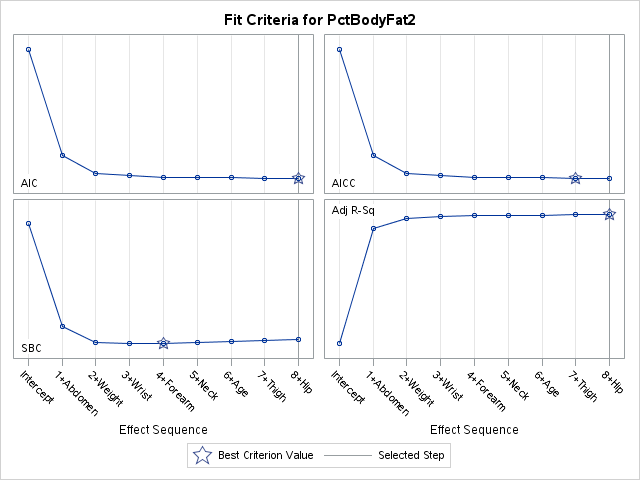
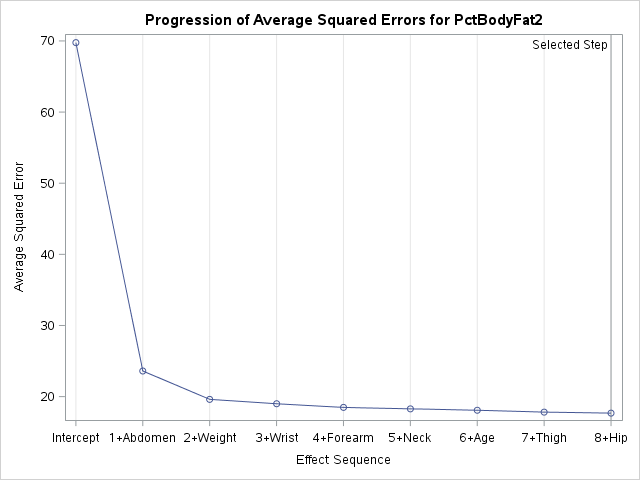

In [7]:
title 'AIC STEPWISE Selection with PctBodyFat2';
proc glmselect data=statdata.bodyfat2 plots=all;
   STEPWISEAIC: model PctBodyFat2=Age Weight Height
                      Neck Chest Abdomen Hip Thigh
                      Knee Ankle Biceps Forearm Wrist
                      / SELECTION=STEPWISE SELECT=AIC;
run;
quit;
title;